In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
# 1. Cargar datos

df_bank = pd.read_csv('../data/bank-additional.csv', sep=',')
df_customers = pd.read_excel('../data/customer-details.xlsx', sheet_name=None)  # Carga todas las hojas en un dict

In [5]:
# 2. Exploración inicial del dataset bank

print("Primeras filas dataset Bank:")
display(df_bank.head())

print("\nInformación general dataset Bank:")
print(df_bank.info())

print("\nEstadísticas descriptivas dataset Bank:")
display(df_bank.describe(include='all').T)

print("\nValores nulos por columna en Bank:")
print(df_bank.isnull().sum())

print("\nNúmero de filas duplicadas en Bank:")
print(df_bank.duplicated().sum())

Primeras filas dataset Bank:


,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb



Información general dataset Bank:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,43000.0,NaN,NaN,NaN,20651.099047,11868.770913,0.0,10381.75,20642.5,30930.25,41187.0
age,37880.0,NaN,NaN,NaN,39.977112,10.437957,17.0,32.0,38.0,47.0,98.0
job,42655,11,admin.,10873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,42915,3,MARRIED,25999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41193,7,university.degree,12722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,34019.0,NaN,NaN,NaN,0.000088,0.00939,0.0,0.0,0.0,0.0,1.0
housing,41974.0,NaN,NaN,NaN,0.535998,0.498708,0.0,0.0,1.0,1.0,1.0
loan,41974.0,NaN,NaN,NaN,0.15562,0.362499,0.0,0.0,0.0,0.0,1.0
contact,43000,2,cellular,27396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,43000.0,NaN,NaN,NaN,257.739279,258.666033,0.0,102.0,179.0,319.0,4918.0



Valores nulos por columna en Bank:
Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

Número de filas duplicadas en Bank:
0


In [6]:
# 3. Exploración inicial dataset customers (cada hoja)

for sheet_name, df in df_customers.items():
    print(f"\n----- Hoja: {sheet_name} -----")
    display(df.head())
    print("Información:")
    print(df.info())
    print("Estadísticas descriptivas:")
    display(df.describe(include='all').T)
    print("Valores nulos:")
    print(df.isnull().sum())
    print("Filas duplicadas:")
    print(df.duplicated().sum())


----- Hoja: 2012 -----


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20115 entries, 0 to 20114
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         20115 non-null  int64         
 1   Income             20115 non-null  int64         
 2   Kidhome            20115 non-null  int64         
 3   Teenhome           20115 non-null  int64         
 4   Dt_Customer        20115 non-null  datetime64[ns]
 5   NumWebVisitsMonth  20115 non-null  int64         
 6   ID                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.1+ MB
None
Estadísticas descriptivas:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,20115.0,NaN,NaN,NaN,10057.0,0.0,5028.5,10057.0,15085.5,20114.0,5806.844668
Income,20115.0,NaN,NaN,NaN,93087.213224,5852.0,49110.0,92962.0,136705.0,180791.0,50614.798255
Kidhome,20115.0,NaN,NaN,NaN,1.004176,0.0,0.0,1.0,2.0,2.0,0.816811
Teenhome,20115.0,NaN,NaN,NaN,0.999503,0.0,0.0,1.0,2.0,2.0,0.815298
Dt_Customer,20115,NaN,NaN,NaN,2012-07-01 17:15:14.362416128,2012-01-01 00:00:00,2012-04-01 00:00:00,2012-07-02 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,NaN
NumWebVisitsMonth,20115.0,NaN,NaN,NaN,16.54079,1.0,9.0,16.0,25.0,32.0,9.235324
ID,20115,20115,089b39d8-e4d0-461b-87d4-814d71e0e079,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores nulos:
Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64
Filas duplicadas:
0

----- Hoja: 2013 -----


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,82407,0,1,2013-10-07,29,ef81336c-e41a-46d0-8a30-5d4ac3b836be
1,1,24877,0,0,2013-04-21,32,50b224ac-84b4-42a7-aba9-3e1d1d620479
2,2,78839,1,0,2013-11-25,21,9cb15c53-b647-464a-add9-09cdae04897c
3,3,113859,1,1,2013-01-06,12,f8aaf334-949d-4943-a214-b64fe9c088b4
4,4,147317,0,0,2013-07-10,14,885fe85a-3718-4760-a32a-a57628cf7528


Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         8965 non-null   int64         
 1   Income             8965 non-null   int64         
 2   Kidhome            8965 non-null   int64         
 3   Teenhome           8965 non-null   int64         
 4   Dt_Customer        8965 non-null   datetime64[ns]
 5   NumWebVisitsMonth  8965 non-null   int64         
 6   ID                 8965 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 490.4+ KB
None
Estadísticas descriptivas:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,8965.0,NaN,NaN,NaN,4482.0,0.0,2241.0,4482.0,6723.0,8964.0,2588.116915
Income,8965.0,NaN,NaN,NaN,92788.951255,5848.0,49866.0,92315.0,136063.0,180787.0,50188.145448
Kidhome,8965.0,NaN,NaN,NaN,0.991523,0.0,0.0,1.0,2.0,2.0,0.810005
Teenhome,8965.0,NaN,NaN,NaN,0.995761,0.0,0.0,1.0,2.0,2.0,0.814981
Dt_Customer,8965,NaN,NaN,NaN,2013-07-02 11:23:37.110987008,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-07-03 00:00:00,2013-10-03 00:00:00,2013-12-31 00:00:00,NaN
NumWebVisitsMonth,8965.0,NaN,NaN,NaN,16.575683,1.0,9.0,17.0,25.0,32.0,9.259737
ID,8965,8965,ef81336c-e41a-46d0-8a30-5d4ac3b836be,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores nulos:
Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64
Filas duplicadas:
0

----- Hoja: 2014 -----


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,168812,1,1,2014-06-10,27,4d6c811c-0f24-4a73-b374-2ebd1f80d46e
1,1,108615,2,1,2014-04-05,24,eef0f24f-cbdb-4c67-b371-09d7bc59695e
2,2,179041,0,2,2014-09-22,4,bbfdcedd-199d-4927-94bb-5dad051ff471
3,3,116639,2,2,2014-08-16,3,e8ebb67d-4ee1-4615-b701-eefe3af607eb
4,4,49537,0,1,2014-09-05,28,f7f79ace-0024-4505-a401-f340946f0942


Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         14090 non-null  int64         
 1   Income             14090 non-null  int64         
 2   Kidhome            14090 non-null  int64         
 3   Teenhome           14090 non-null  int64         
 4   Dt_Customer        14090 non-null  datetime64[ns]
 5   NumWebVisitsMonth  14090 non-null  int64         
 6   ID                 14090 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 770.7+ KB
None
Estadísticas descriptivas:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,14090.0,NaN,NaN,NaN,7044.5,0.0,3522.25,7044.5,10566.75,14089.0,4067.576981
Income,14090.0,NaN,NaN,NaN,93706.470405,5841.0,50180.25,93589.0,137195.5,180802.0,50527.970173
Kidhome,14090.0,NaN,NaN,NaN,1.013982,0.0,0.0,1.0,2.0,2.0,0.818562
Teenhome,14090.0,NaN,NaN,NaN,0.999219,0.0,0.0,1.0,2.0,2.0,0.817727
Dt_Customer,14090,NaN,NaN,NaN,2014-07-01 16:25:06.430092288,2014-01-01 00:00:00,2014-04-04 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,14090.0,NaN,NaN,NaN,16.673314,1.0,9.0,17.0,25.0,32.0,9.239609
ID,14090,14090,4d6c811c-0f24-4a73-b374-2ebd1f80d46e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores nulos:
Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64
Filas duplicadas:
0


In [7]:
# 4. Limpieza básica y transformación de datos

# Eliminar columna índice extra si no aporta
if 'Unnamed: 0' in df_bank.columns:
    df_bank.drop(columns=['Unnamed: 0'], inplace=True)

# Convertir columnas con coma decimal a float
cols_coma_decimal = ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in cols_coma_decimal:
    # Reemplazamos coma por punto y convertimos a float
    df_bank[col] = df_bank[col].str.replace(',', '.').astype(float)

# Función para traducir meses en español a inglés (para poder parsear fecha)
def traducir_mes(fecha_str):
    meses_es = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
                'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
    meses_en = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
    for mes_es, mes_en in zip(meses_es, meses_en):
        if mes_es in fecha_str.lower():
            return fecha_str.lower().replace(mes_es, mes_en)
    return fecha_str

# Aplicar traducción a la columna date y convertir a datetime
df_bank['date'] = df_bank['date'].astype(str).apply(traducir_mes)
df_bank['date'] = pd.to_datetime(df_bank['date'], format='%d-%B-%Y', errors='coerce')

# Convertir fechas en customer-details (Dt_Customer) a datetime
for sheet_name, df in df_customers.items():
    if 'Unnamed: 0' in df.columns:
        df_customers[sheet_name] = df.drop(columns=['Unnamed: 0'])
    if 'Dt_Customer' in df.columns:
        df_customers[sheet_name]['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [8]:
# 5. Estadísticas descriptivas básicas

print("\nEdad media clientes bank:", df_bank['age'].mean())


Edad media clientes bank: 39.97711193241816


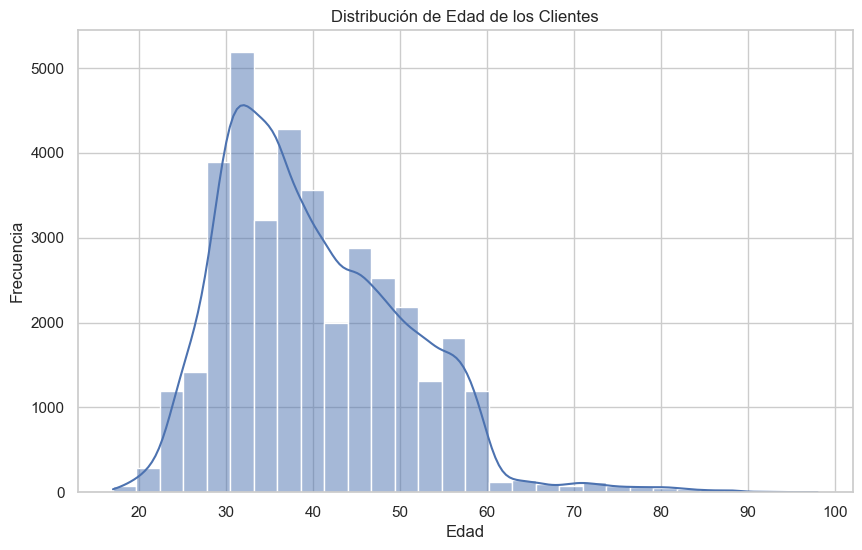

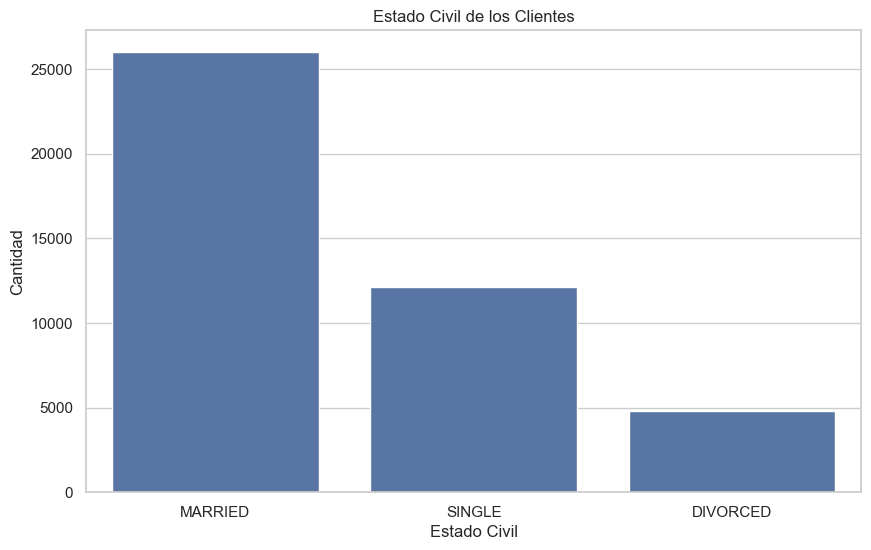

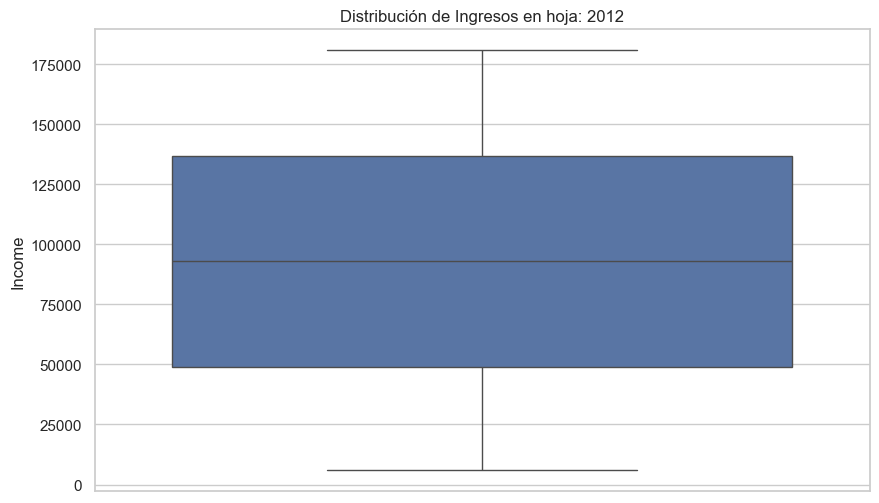

In [9]:
# 6. Visualizaciones básicas

plt.figure(figsize=(10,6))
sns.histplot(df_bank['age'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='marital', data=df_bank)
plt.title('Estado Civil de los Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.show()

# Visualización de ingresos para la primera hoja de clientes
first_sheet = list(df_customers.keys())[0]
plt.figure(figsize=(10,6))
sns.boxplot(data=df_customers[first_sheet], y='Income')
plt.title(f'Distribución de Ingresos en hoja: {first_sheet}')
plt.show()

In [10]:
# 7. Ejemplo agrupamiento y media

edad_media_por_estado_civil = df_bank.groupby('marital')['age'].mean()
print("Edad media por estado civil:")
print(edad_media_por_estado_civil)

Edad media por estado civil:
marital
DIVORCED    44.965712
MARRIED     42.244398
SINGLE      33.104863
Name: age, dtype: float64


In [12]:
# 8. Tratamiento y análisis de valores nulos

# Mostrar porcentaje de valores nulos por columna para entender su impacto
nulos_pct = (df_bank.isnull().sum() / len(df_bank)) * 100
print("Porcentaje de valores nulos por columna en df_bank:")
print(nulos_pct.sort_values(ascending=False))

# Decisión sobre columnas con muchos nulos: ejemplo, eliminar columnas si tienen >30% nulos
columnas_muchos_nulos = nulos_pct[nulos_pct > 30].index.tolist()
print("\nColumnas con más del 30% de nulos que podrían eliminarse o tratarse:")
print(columnas_muchos_nulos)

# Eliminar columnas con muchos nulos
df_bank_limpio = df_bank.drop(columns=columnas_muchos_nulos)

# Para las columnas numéricas con pocos nulos, rellenar con la mediana
cols_num_con_nulos = df_bank_limpio.select_dtypes(include=['float64', 'int64']).columns
for col in cols_num_con_nulos:
    if df_bank_limpio[col].isnull().sum() > 0:
        mediana = df_bank_limpio[col].median()
        df_bank_limpio[col] = df_bank_limpio[col].fillna(mediana)
        print(f"Columna '{col}': nulos rellenados con mediana ({mediana})")

# Para columnas categóricas, rellenar con la moda 
cols_cat_con_nulos = df_bank_limpio.select_dtypes(include=['object']).columns
for col in cols_cat_con_nulos:
    if df_bank_limpio[col].isnull().sum() > 0:
        moda = df_bank_limpio[col].mode()[0]
        df_bank_limpio[col] = df_bank_limpio[col].fillna(moda)
        print(f"Columna '{col}': nulos rellenados con moda ('{moda}')")

# Verificar que ya no quedan nulos
print("\nNulos restantes tras tratamiento:")
print(df_bank_limpio.isnull().sum())


Porcentaje de valores nulos por columna en df_bank:
euribor3m         21.525581
default           20.886047
age               11.906977
education          4.202326
housing            2.386047
loan               2.386047
cons.price.idx     1.095349
job                0.802326
date               0.576744
marital            0.197674
contact            0.000000
pdays              0.000000
previous           0.000000
campaign           0.000000
duration           0.000000
emp.var.rate       0.000000
poutcome           0.000000
nr.employed        0.000000
cons.conf.idx      0.000000
y                  0.000000
latitude           0.000000
longitude          0.000000
id_                0.000000
dtype: float64

Columnas con más del 30% de nulos que podrían eliminarse o tratarse:
[]
Columna 'age': nulos rellenados con mediana (38.0)
Columna 'default': nulos rellenados con mediana (0.0)
Columna 'housing': nulos rellenados con mediana (1.0)
Columna 'loan': nulos rellenados con mediana (0.0)
Column

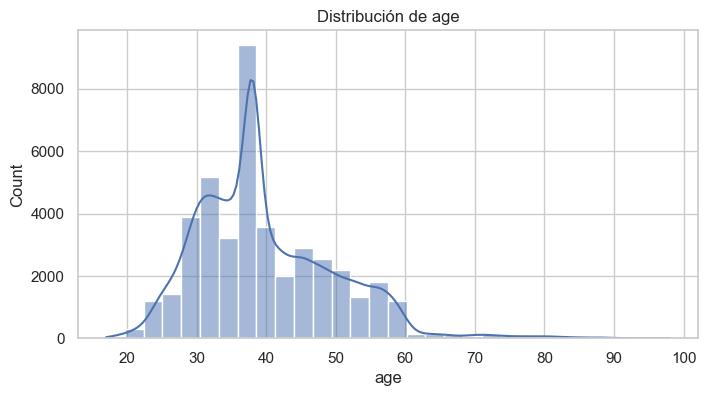

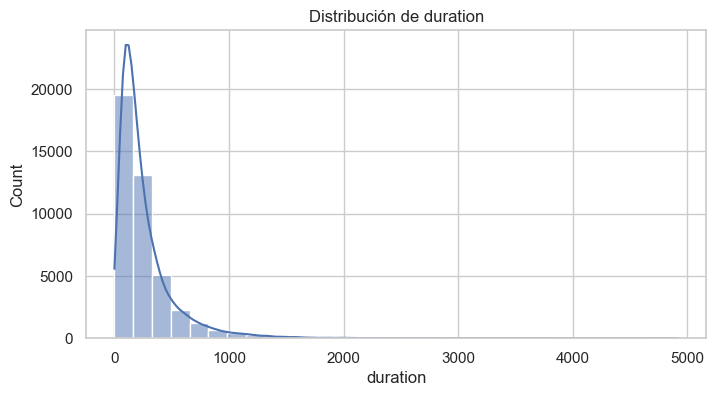

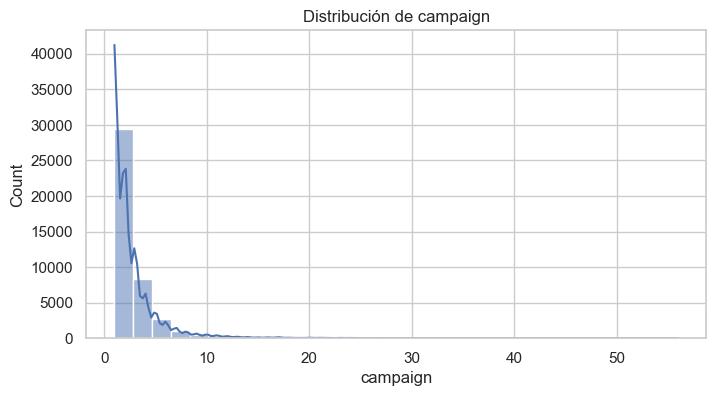

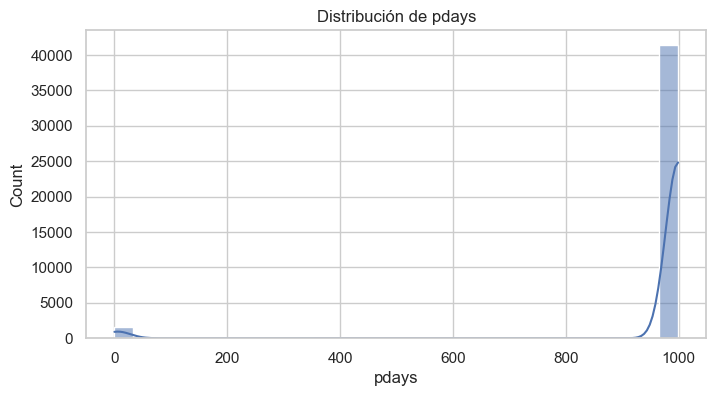

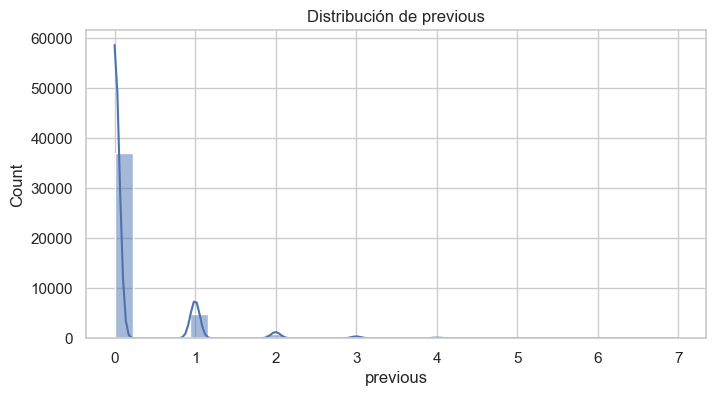

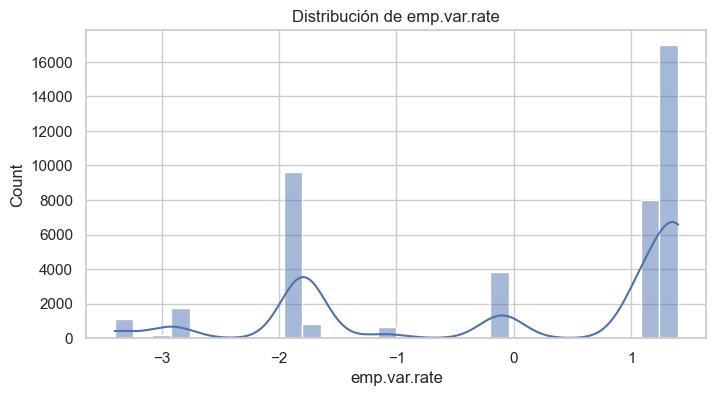

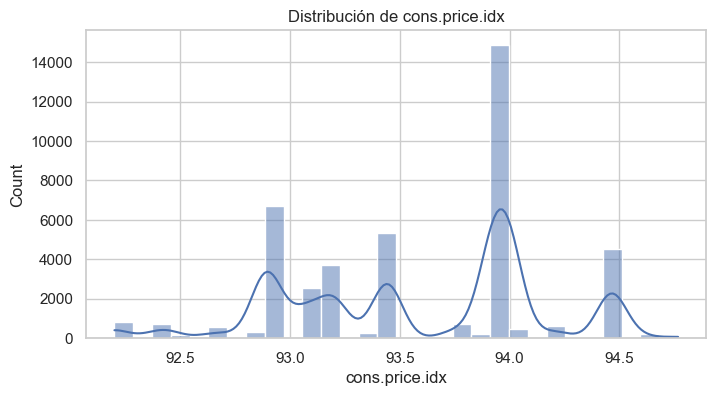

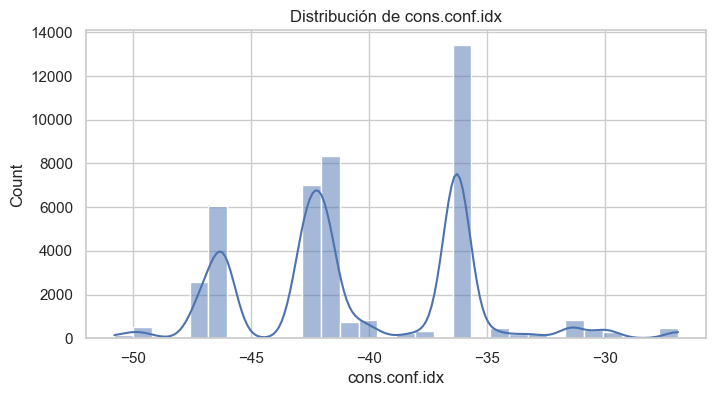

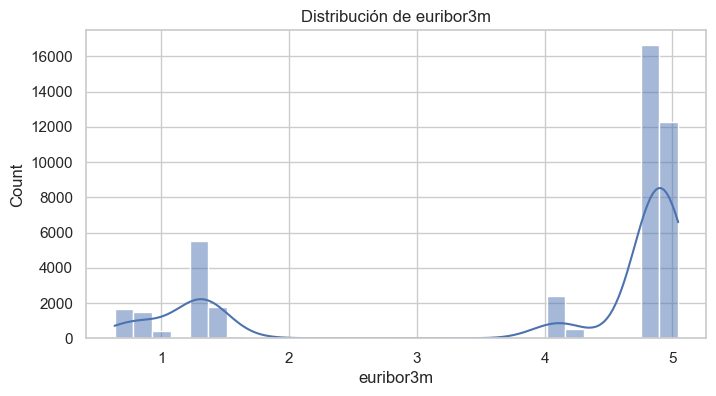

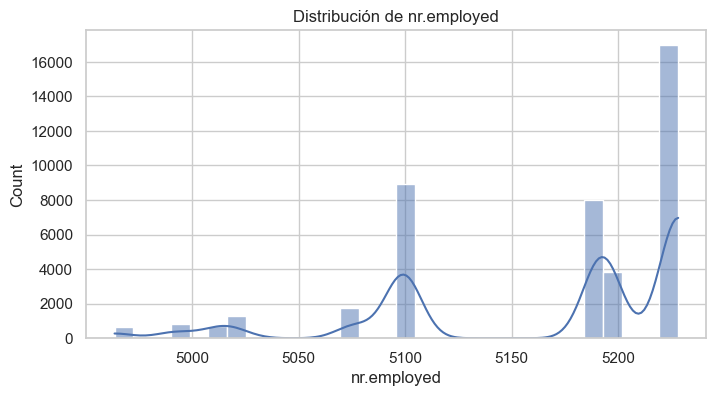

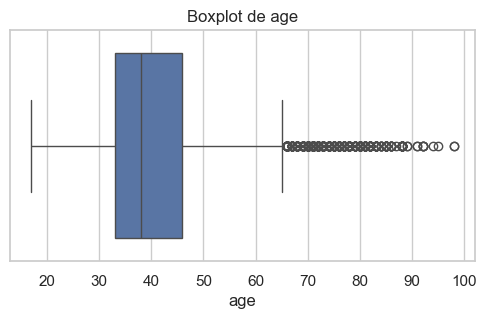

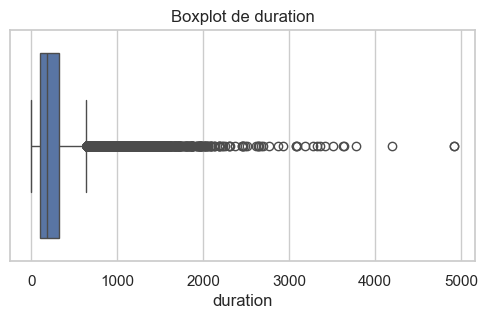

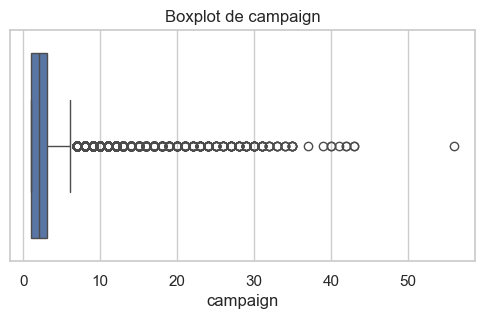

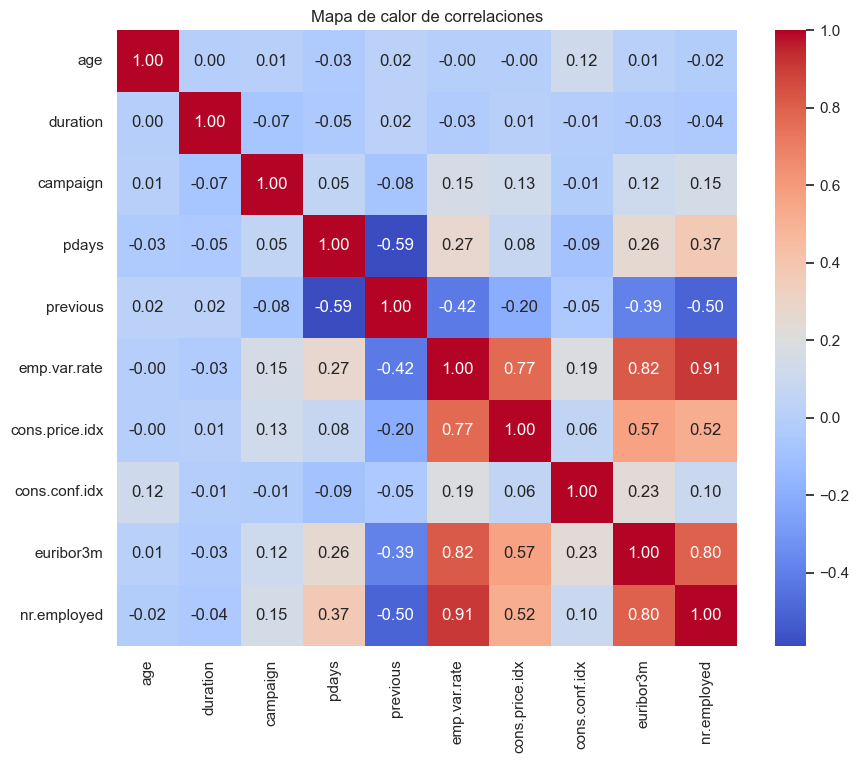

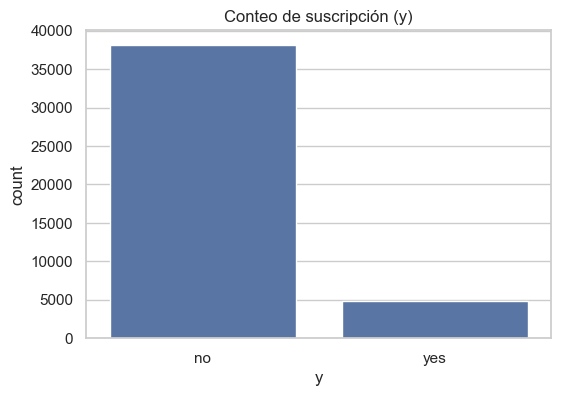

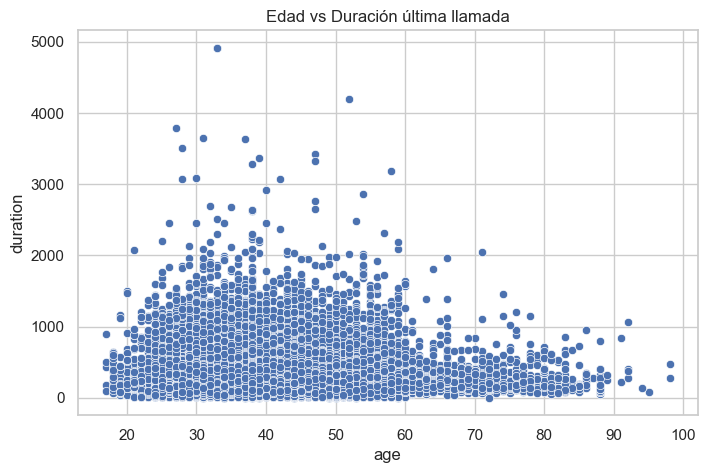

In [13]:
# 9. Visualizaciones y análisis de correlaciones

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Histograma + KDE para variables numéricas clave
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for var in num_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(df_bank_limpio[var], bins=30, kde=True)
    plt.title(f'Distribución de {var}')
    plt.show()

# Boxplots para detectar outliers en variables clave
for var in ['age', 'duration', 'campaign']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_bank_limpio[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

# Mapa de calor de correlaciones entre variables numéricas
plt.figure(figsize=(10,8))
corr = df_bank_limpio[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

# Conteo para variable objetivo 'y'
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df_bank_limpio)
plt.title('Conteo de suscripción (y)')
plt.show()

# Scatterplot ejemplo: edad vs duración última llamada
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='duration', data=df_bank_limpio)
plt.title('Edad vs Duración última llamada')
plt.show()

Tasa global de suscripción: 11.27%

Tasa de suscripción por profesión:
y              tasa_suscripcion
job                            
student                0.313400
retired                0.251955
unemployed             0.143932
admin.                 0.129613
management             0.112131
technician             0.108454
self-employed          0.108126
housemaid              0.098842
entrepreneur           0.082786
services               0.080730
blue-collar            0.068883

Tasa de suscripción por educación:
y                    tasa_suscripcion
education                            
illiterate                   0.222222
university.degree            0.138275
professional.course          0.113201
high.school                  0.108413
basic.4y                     0.102847
basic.6y                     0.081308
basic.9y                     0.078142

Tasa de suscripción por estado civil:
y         tasa_suscripcion
marital                   
SINGLE            0.139281
MARRIED        

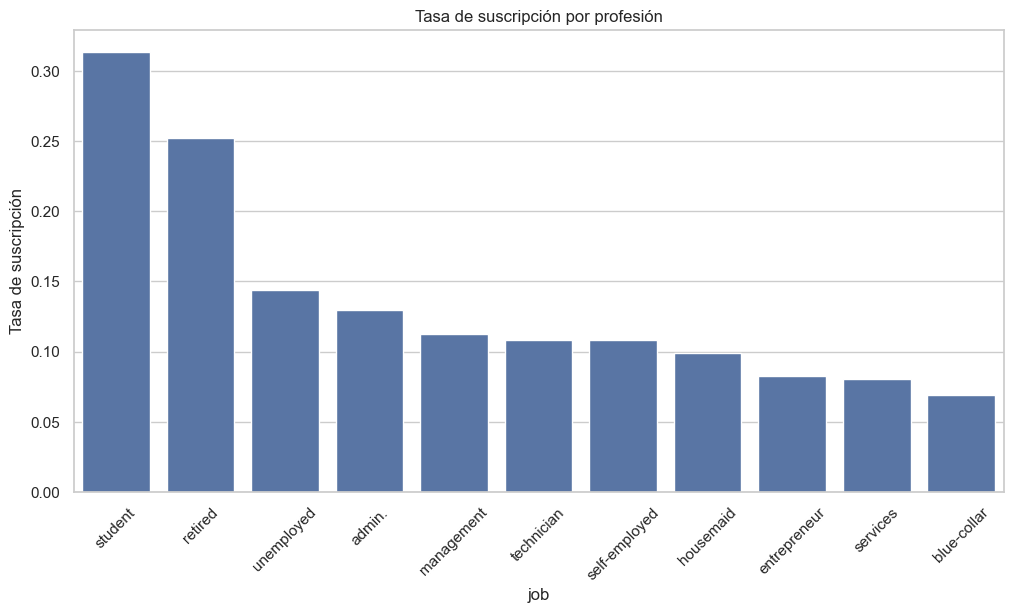

In [14]:
# 10. Análisis segmentado: tasas de suscripción según categorías

# Tasa de suscripción global
tasa_global = df_bank_limpio['y'].value_counts(normalize=True).get('yes', 0)
print(f"Tasa global de suscripción: {tasa_global:.2%}\n")

# Función para calcular tasa de suscripción por grupo
def tasa_suscripcion_por_grupo(df, grupo_col):
    resumen = df.groupby(grupo_col)['y'].value_counts(normalize=True).unstack().fillna(0)
    resumen['tasa_suscripcion'] = resumen.get('yes', 0)
    resumen_sorted = resumen.sort_values(by='tasa_suscripcion', ascending=False)
    return resumen_sorted[['tasa_suscripcion']]

# Tasa por profesión (job)
print("Tasa de suscripción por profesión:")
print(tasa_suscripcion_por_grupo(df_bank_limpio, 'job'))

# Tasa por nivel educativo
print("\nTasa de suscripción por educación:")
print(tasa_suscripcion_por_grupo(df_bank_limpio, 'education'))

# Tasa por estado civil
print("\nTasa de suscripción por estado civil:")
print(tasa_suscripcion_por_grupo(df_bank_limpio, 'marital'))

# Visualización ejemplo: tasa de suscripción por profesión
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
suscripcion_job = tasa_suscripcion_por_grupo(df_bank_limpio, 'job').reset_index()
sns.barplot(data=suscripcion_job, x='job', y='tasa_suscripcion')
plt.title('Tasa de suscripción por profesión')
plt.ylabel('Tasa de suscripción')
plt.xticks(rotation=45)
plt.show()